----------------------------
##**Problem statement -:**
----------------------------
 The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
insurance_df = pd.read_csv("/content/drive/My Drive/iNeuron Project/insurance.csv")#reading file stored in drive

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
insurance_df.shape

(1338, 7)

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


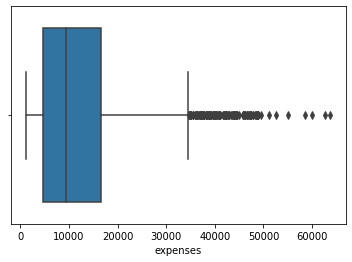

In [ ]:
#checking for outlier
sns.boxplot(insurance_df["expenses"])

outlier detected in expenses. we will remove it using zscore.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


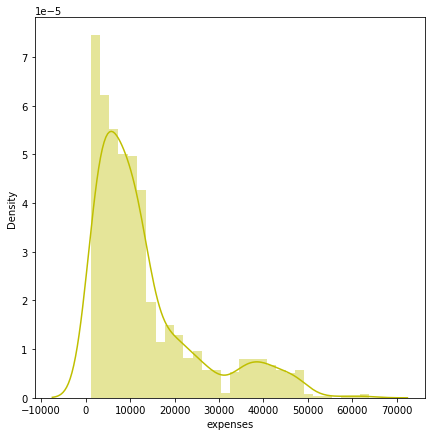

In [ ]:
# Dependent variable 'expenses'
plt.figure(figsize=(7,7))
sns.distplot(insurance_df['expenses'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


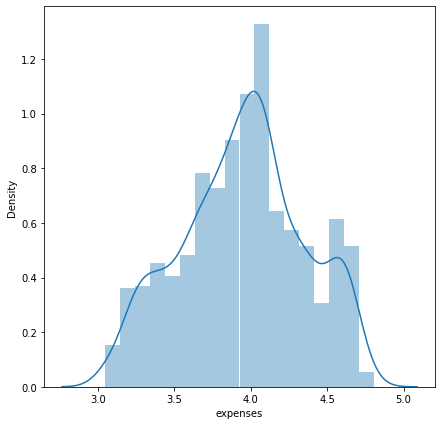

In [ ]:
#replacing original expenses column with the log transformed values.
# Dependent variable 'expenses'
plt.figure(figsize=(7,7))
insurance_df['expenses'] = np.log10(insurance_df['expenses'])
sns.distplot(insurance_df['expenses'])

In [ ]:
#dropping outlier from expenses column
from scipy import stats
z_scores = stats.zscore(insurance_df['expenses'])  #calculating zscore for expense column
abs_z_scores = np.abs(z_scores)                    #taking absolute zscore
filtered_entries = (abs_z_scores < 3)              #taking only those rows have absolute_zscore<3
insurance_df = insurance_df[filtered_entries]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


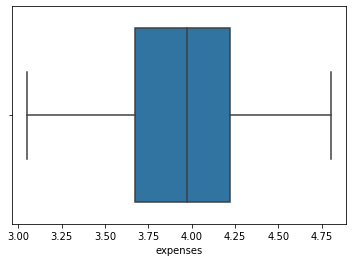

In [ ]:
#after imputing outlier
sns.boxplot(insurance_df["expenses"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


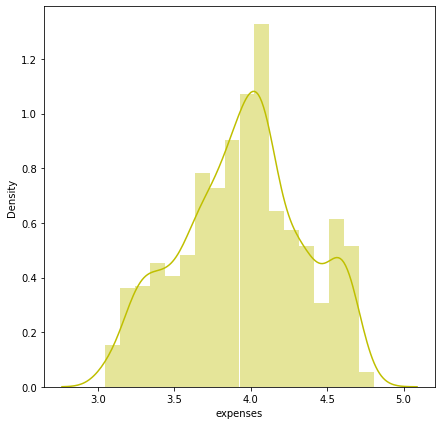

In [ ]:
# Dependent variable 'expenses'
plt.figure(figsize=(7,7))
sns.distplot(insurance_df['expenses'],color="y")

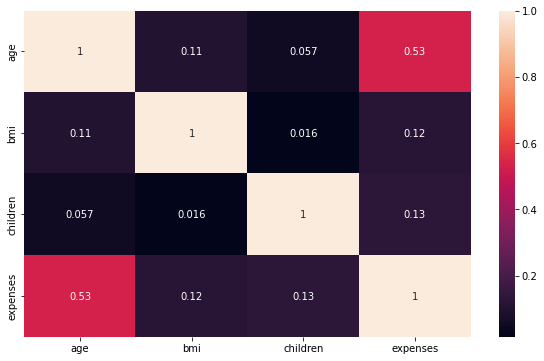

In [ ]:
#checking correlation of our data
corr_matrix = insurance_df.corr(method='spearman')
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

There are no such column with high correaltion. so we can keep all columns to predict expenses.

In [ ]:
#check for duplicate data
duplicate = insurance_df.duplicated()
print(duplicate.value_counts())

False    1337
True        1
dtype: int64


there is only one duplicate data. so we will drop that duplicate data.

In [ ]:
#drop duplicate rows- if any
insurance_df.drop_duplicates(inplace= True)

In [ ]:
#check for duplicate data again
insurance_df.duplicated().sum()

0

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**********************
##***Visualisation***
**********************


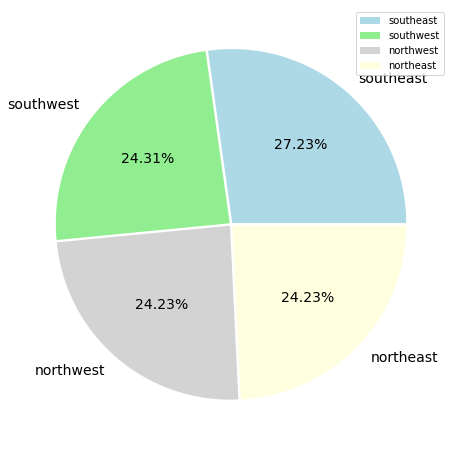

In [ ]:
#Checking which region has more reservations
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = insurance_df['region'].value_counts().index.tolist()

# Convert value counts to list
sizes = insurance_df['region'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0.01,0.01,0.01,0.01)

# Determine colour of pie chart
colors = ['lightblue','lightgreen','lightgrey', 'lightyellow']

plt.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.legend()

more people living in southeast region 27.22% followed by southwest 24.29%, northeast and northwest 24.29%, 24.21% respectively.

Text(0.5, 1.0, 'smoker and non-smoker in different region')

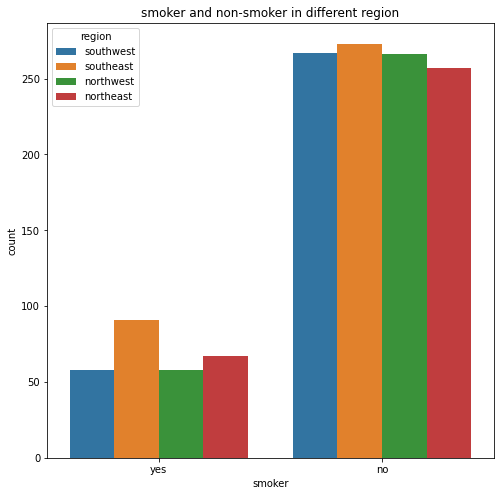

In [ ]:
#countplot for smoker in region
insurance_df['smoker']= insurance_df.smoker.replace([1,0], ['smoker','not_smoker'])
sns.countplot(x='smoker',hue='region',data=insurance_df)
plt.title("smoker and non-smoker in different region")

there are large number of non-smoker in different region and all region have atleast 50 people smokers

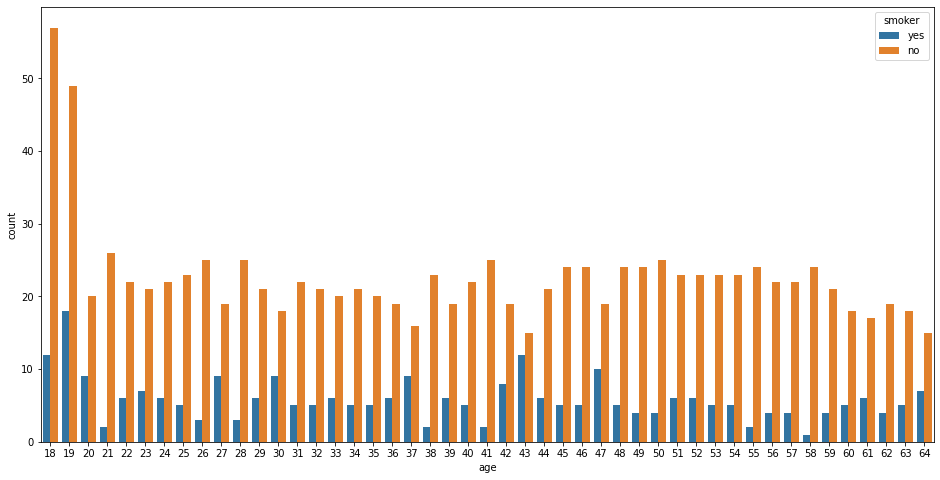

In [ ]:
#checking number of smokers in different age
plt.rcParams['figure.figsize'] = 16,8
sns.countplot(x='age',hue='smoker',data=insurance_df)

In all age people are smoking and maximum people are from age 19.

Text(0.5, 1.0, 'smoker and non-smoker in sex')

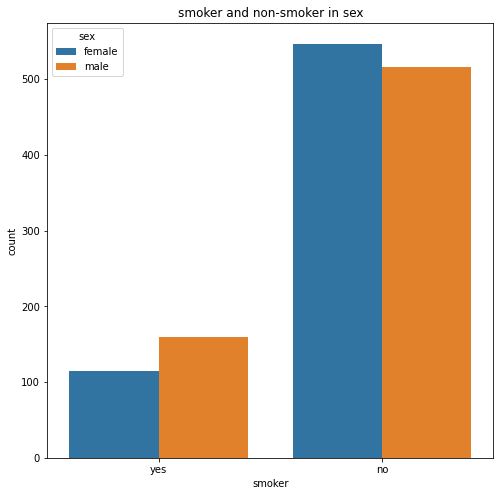

In [ ]:
#checking smoker sex wise
plt.rcParams['figure.figsize'] = 8,8
insurance_df['smoker']= insurance_df.smoker.replace([1,0], ['smoker','not_smoker'])
sns.countplot(x='smoker',hue='sex',data=insurance_df)
plt.title("smoker and non-smoker in sex")

gender wise male ratio is higher than female smoking and in non-smoking female have high ratio than male

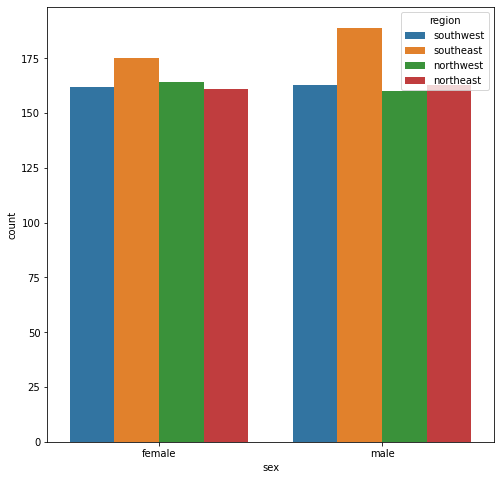

In [ ]:
#checking region-wise gender distribution
sns.countplot(x='sex',hue='region',data=insurance_df)
#plt.title("")

there are almost equal number of male and female ratio in all region.

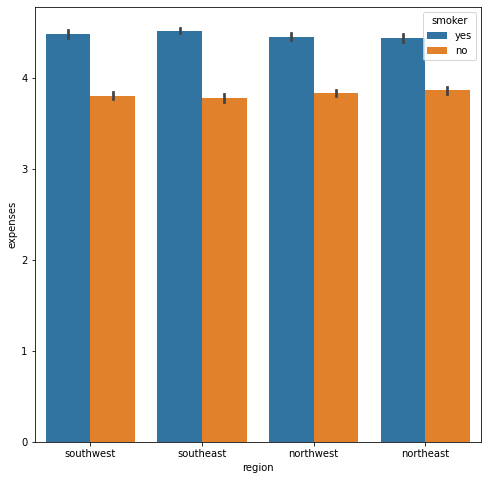

In [ ]:
#checking region wise expenses for smokers
sns.barplot(x='region', y = 'expenses', hue='smoker',data=insurance_df)

from above graph found that smoker have high expenses compare to non-smoker.

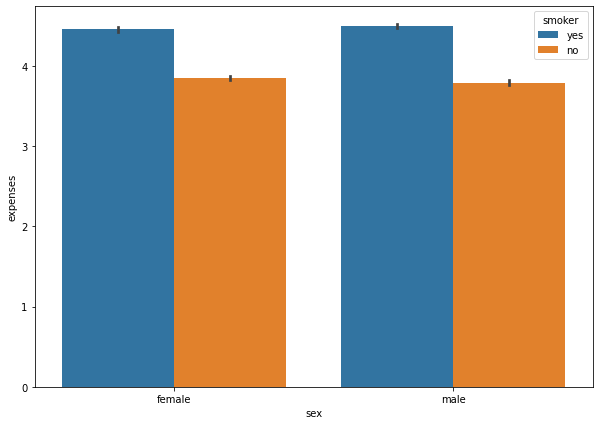

In [ ]:
#checking expenses gender wise if it's smoker or not
plt.rcParams['figure.figsize'] = 10,7
sns.barplot(x='sex', y = 'expenses', hue='smoker',data=insurance_df)

from above graph we found that rather male or female if he/she is smoking they are having higher expenses compare to the non-smokers

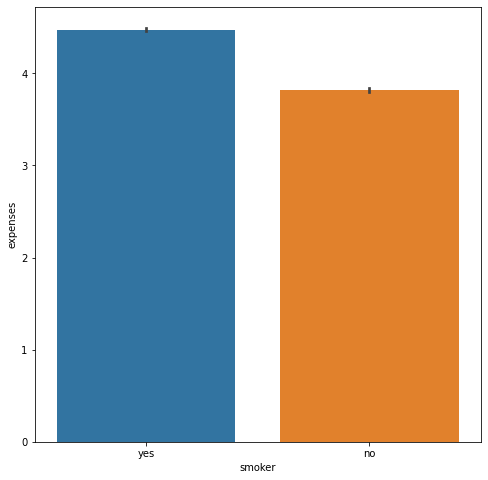

In [ ]:
#ploting batplot to finalise that smoker have higher expenses than non-smoker
plt.rcParams['figure.figsize'] = 8,8
sns.barplot(x='smoker', y = 'expenses',data=insurance_df)

Above we checked expenses for smokers and non-smoker.Now below we wil check smoker and non-smoker in our data

In [ ]:
insurance_df["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

in our data 1063 people are smokers and 267 people are non-smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'smoker count')

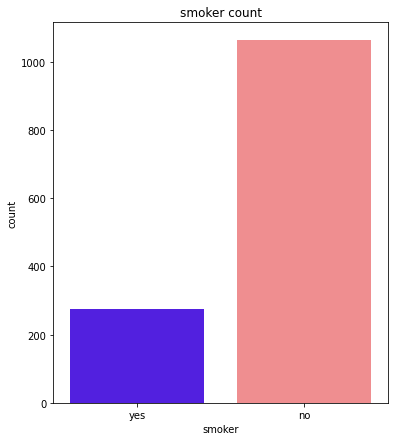

In [ ]:
#countplot for smoker and non-smoker
insurance_df["smoker"].value_counts()
plt.figure(figsize=(6,7))
sns.countplot(insurance_df["smoker"], palette="gnuplot2")
plt.title("smoker count")

From above graph we can found that there are very less people are smoking compare to non-smoker.(rather we have very less people with smoking but there is large effect on expenses because smokers are having large expenses.this we will check using scatterplot.)

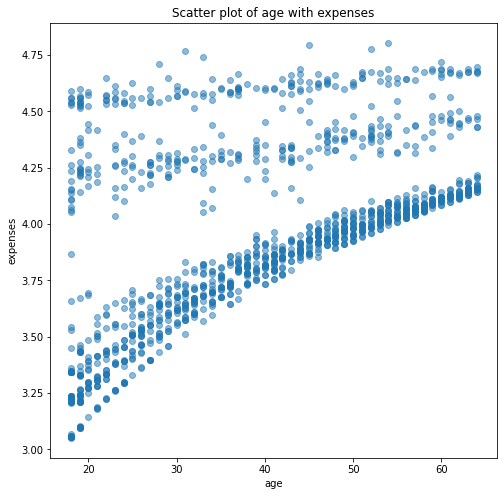

In [ ]:
#ploting scatter plot for age vs expenses
plt.scatter(insurance_df['age'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of age with expenses')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

We can see that from above chart all the smoker having large expenses and non-smokers having linearly increasing expenses.

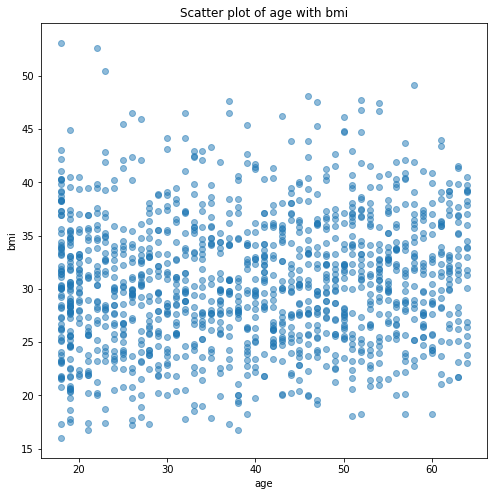

In [ ]:
#ploting scatter plot for age vs bmi
plt.scatter(insurance_df['age'], insurance_df['bmi'], alpha=0.5)
plt.title('Scatter plot of age with bmi')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

no correlation between age and bmi

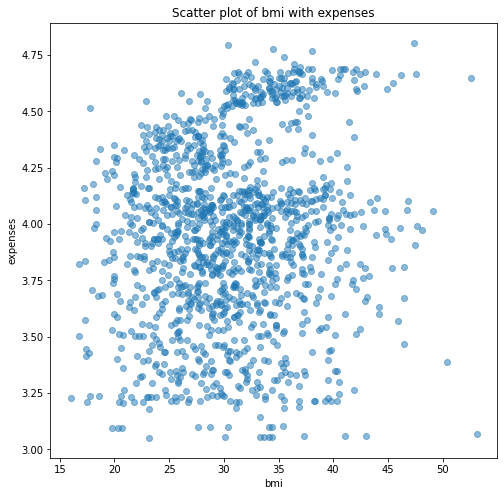

In [ ]:
#ploting scatter plot for bmi vs expenses
plt.scatter(insurance_df['bmi'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of bmi with expenses')
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.show()

from above plot we can see that there are some data points are realted with bmi maybe because of they are smokers.

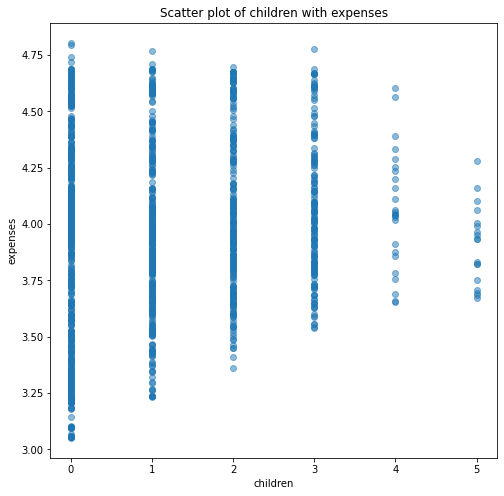

In [ ]:
#plotting scatterplot children vs expenses
plt.scatter(insurance_df['children'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of children with expenses')
plt.xlabel('children')
plt.ylabel('expenses')
plt.show()

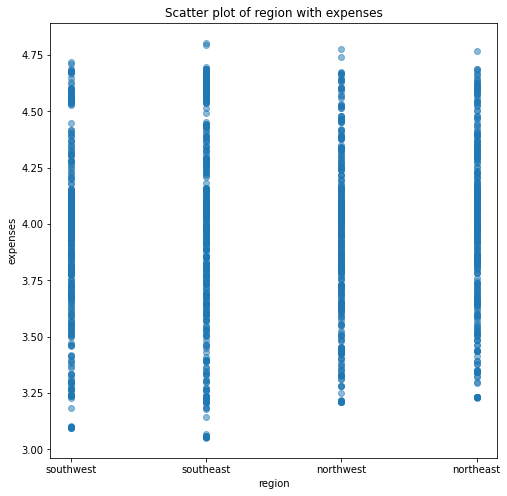

In [ ]:
#plotting scatterplot region vs expenses
plt.scatter(insurance_df['region'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of region with expenses')
plt.xlabel('region')
plt.ylabel('expenses')
plt.show()

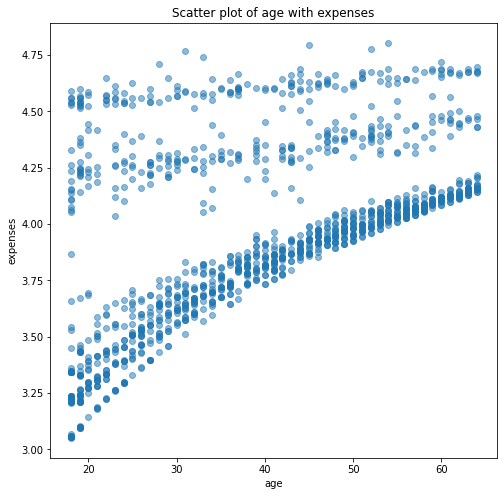

In [ ]:
#ploting scatter plot for age vs expenses
plt.scatter(insurance_df['age'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of age with expenses')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

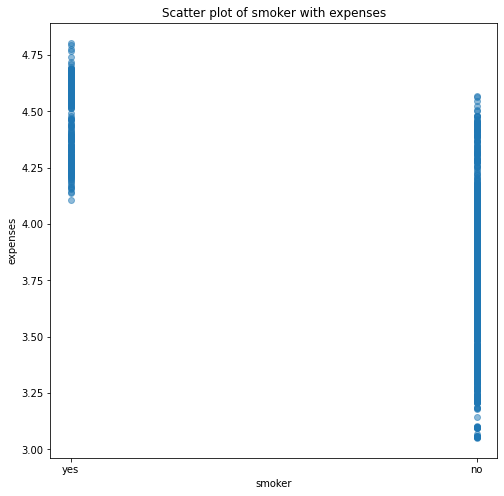

In [ ]:
#ploting scatter plot for smoker vs expenses
plt.scatter(insurance_df['smoker'], insurance_df['expenses'], alpha=0.5)
plt.title('Scatter plot of smoker with expenses')
plt.xlabel('smoker')
plt.ylabel('expenses')
plt.show()

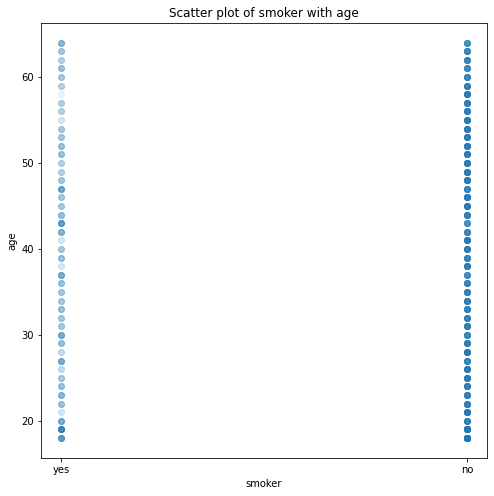

In [ ]:
#ploting scatter plot for age vs smoker
plt.scatter(insurance_df['smoker'], insurance_df['age'], alpha=0.09)
plt.title('Scatter plot of smoker with age')
plt.xlabel('smoker')
plt.ylabel('age')
plt.show()

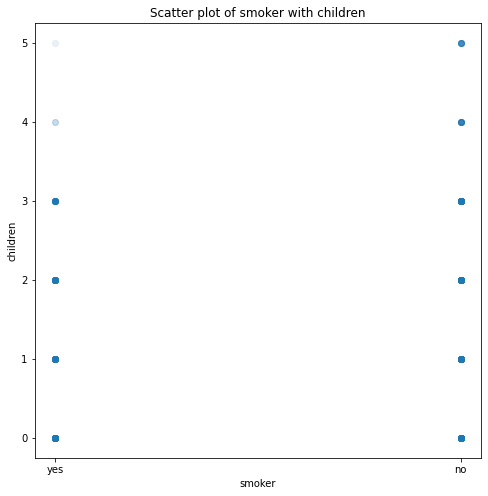

In [ ]:
#ploting scatter plot for smoker vs children
plt.scatter(insurance_df['smoker'], insurance_df['children'], alpha=0.09)
plt.title('Scatter plot of smoker with children')
plt.xlabel('smoker')
plt.ylabel('children')
plt.show()

----------------------------
##***Feature Engineering***
---------------------------

In [ ]:
# Create dummy variables for the catgeorical variable sex
insurance_df['male_'] = np.where(insurance_df['sex']=='male', 1, 0)

# Drop the original column sex from the dataframe
insurance_df.drop(columns=['sex'],axis=1,inplace=True)

In [ ]:
#categorizing person depends on it's bmi
def categorize_bmi(bmi):
    if (bmi <= 18.5):
      cat1 = "Underweight"
      return cat1
    elif (18.5 < bmi <= 24.9):
      cat2 = "Normal"
      return cat2
    elif (24.9 < bmi <= 29.9):
      cat3 = "Overweight"
      return cat3
    elif (bmi >= 30):
      cat4 = "Obese"
      return cat4

In [ ]:
#creating new column for categorize bmi
insurance_df['bmi_category'] = insurance_df['bmi'].apply (lambda BMI: categorize_bmi(BMI))

In [ ]:
# Create dummy variables for the catgeorical variable bmi
insurance_df['Underweight_bmi'] = np.where(insurance_df['bmi_category']=='Underweight', 1, 0)
insurance_df['Normal_bmi'] = np.where(insurance_df['bmi_category']=='Normal', 1, 0)
insurance_df['Overweight_bmi'] = np.where(insurance_df['bmi_category']=='Overweight', 1, 0)
insurance_df['Obese_bmi'] = np.where(insurance_df['bmi_category']=='Obese', 1, 0)

# Drop the original column bmi and bmi_category from the dataframe
insurance_df.drop(columns=["bmi","bmi_category"],axis=1,inplace=True)

In [ ]:
# Create dummy variables for the catgeorical variable children
insurance_df['children_1'] = np.where(insurance_df['children']== 1 , 1, 0)
insurance_df['children_2'] = np.where(insurance_df['children']== 2 , 1, 0)
insurance_df['children_3'] = np.where(insurance_df['children']== 3 , 1, 0)
insurance_df['children_4'] = np.where(insurance_df['children']== 4 , 1, 0)
insurance_df['children_5'] = np.where(insurance_df['children']== 5 , 1, 0)

# Drop the original column children from the dataframe
insurance_df.drop(columns=['children'],axis=1,inplace=True)

In [ ]:
# Create dummy variables for the catgeorical variable smoker
insurance_df['smoker_'] = np.where(insurance_df['smoker']=='yes', 1, 0)

# Drop the original column smoker from the dataframe
insurance_df.drop(columns=['smoker'],axis=1,inplace=True)

In [ ]:
# Create dummy variables for the catgeorical variable region
insurance_df['southeast_region'] = np.where(insurance_df['region']=='southeast', 1, 0)
insurance_df['southwest_region'] = np.where(insurance_df['region']=='southwest', 1, 0)
insurance_df['northwest_region'] = np.where(insurance_df['region']=='northwest', 1, 0)
insurance_df['northeast_region'] = np.where(insurance_df['region']=='northeast', 1, 0)

# Drop the original column region from the dataframe
insurance_df.drop(columns=['region'],axis=1,inplace=True)

In [ ]:
insurance_df.head()

,age,expenses,male_,Underweight_bmi,Normal_bmi,Overweight_bmi,Obese_bmi,children_1,children_2,children_3,children_4,children_5,smoker_,southeast_region,southwest_region,northwest_region,northeast_region
0,19,4.227499,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,3.236928,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
2,28,3.648307,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,33,4.342116,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,32,3.587358,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


*******************
##***Preparing model***
*******************

In [ ]:
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
#dependent variable
dependent_variable = "expenses"

In [ ]:
#independent variable
independent_variable = list(set(insurance_df.columns.to_list()) - {dependent_variable} )

In [ ]:
independent_variable

['Underweight_bmi',
 'children_3',
 'southeast_region',
 'southwest_region',
 'male_',
 'children_5',
 'children_4',
 'northeast_region',
 'Overweight_bmi',
 'age',
 'children_2',
 'children_1',
 'northwest_region',
 'Normal_bmi',
 'smoker_',
 'Obese_bmi']

In [ ]:
#create the data of independent variables
X = insurance_df[independent_variable].values

#create the data of dependent variables
y = insurance_df[dependent_variable].values

In [ ]:
insurance_df[independent_variable]

,Underweight_bmi,children_3,southeast_region,southwest_region,male_,children_5,children_4,northeast_region,Overweight_bmi,age,children_2,children_1,northwest_region,Normal_bmi,smoker_,Obese_bmi
0,0,0,0,1,0,0,0,0,1,19,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,18,0,1,0,0,0,1
2,0,1,1,0,1,0,0,0,0,28,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,33,0,0,1,1,0,0
4,0,0,0,0,1,0,0,0,1,32,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,1,0,0,0,0,50,0,0,1,0,0,1
1334,0,0,0,0,0,0,0,1,0,18,0,0,0,0,0,1
1335,0,0,1,0,0,0,0,0,0,18,0,0,0,0,0,1
1336,0,0,0,1,0,0,0,0,1,21,0,0,0,0,0,0


In [ ]:
#splitting the dataset into the Training test and Test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
X_train[0:20]

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  0, 43,  1,  0,  0,  1,  1,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 23,  1,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 54,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 58,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 25,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0, 36,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  1,  0,  1,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 36,  0,  1,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 34,  0,  0,  1,  0,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1, 26,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1, 30,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 57,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0, 64,  0,

In [ ]:
#transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.54347826,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.10869565,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.7826087 ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

In [ ]:
np.any(np.isnan(insurance_df))

False

In [ ]:
np.all(np.isfinite(insurance_df))

True

------------------------
##**Linear Regression**
-----------------------

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-3375972203348.2427

In [ ]:
regressor.coef_

array([ 7.94137288e+12,  8.98437500e-02, -4.56540067e+12, -4.56540067e+12,
       -2.68554688e-02,  2.00683594e-01,  2.30834961e-01, -4.56540067e+12,
        7.94137288e+12,  6.86035156e-01,  1.26708984e-01,  7.16552734e-02,
       -4.56540067e+12,  7.94137288e+12,  6.74194336e-01,  7.94137288e+12])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

array([4.29662242, 3.05593995, 4.5855919 , ..., 3.60832489, 3.21654327,
       4.05093551])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted expenses on the test data
y_pred

array([3.47216797, 3.93164062, 4.01416016, 4.13330078, 3.76123047,
       3.36083984, 3.46240234, 3.36816406, 3.52539062, 4.08056641,
       3.91943359, 4.19287109, 4.15136719, 3.94189453, 3.76123047,
       3.59033203, 3.70751953, 3.67089844, 3.68994141, 4.16943359,
       3.47216797, 4.11865234, 3.45458984, 3.58740234, 3.50439453,
       3.76074219, 3.44189453, 4.12939453, 3.62109375, 4.25048828,
       3.85693359, 4.73779297, 3.91992188, 3.99121094, 4.18554688,
       4.34423828, 3.98974609, 4.33398438, 3.87451172, 3.49609375,
       4.18457031, 3.56396484, 3.70849609, 4.85400391, 4.14599609,
       3.90673828, 3.99414062, 3.89013672, 4.02978516, 3.84912109,
       4.66357422, 3.64111328, 4.58642578, 4.41455078, 4.06884766,
       3.56884766, 3.62158203, 3.88867188, 3.95166016, 4.70458984,
       4.02490234, 4.09570312, 3.67724609, 4.17041016, 3.67138672,
       3.64794922, 3.39501953, 4.41455078, 3.55810547, 4.01513672,
       4.62255859, 3.67431641, 3.78076172, 4.14306641, 4.02392

In [ ]:
# Actual expenses on test data
y_test

array([3.21324142, 3.93184876, 3.96802226, 4.51252884, 3.98426846,
       3.42828871, 3.34206523, 3.09397121, 3.43310228, 4.08763379,
       3.91806286, 4.23155471, 4.14533503, 3.91482955, 3.7381818 ,
       3.38704439, 3.72163093, 3.54289386, 3.8222034 , 4.16710072,
       3.21010172, 4.1213855 , 3.09909336, 3.42214153, 3.22391887,
       3.66909456, 3.57201494, 4.06269101, 3.57479727, 4.57362968,
       3.9063178 , 4.67635418, 4.0243662 , 4.31450512, 4.16351588,
       4.56324703, 3.92153874, 4.70922381, 3.92572813, 3.27427103,
       4.52473122, 3.45744587, 3.65936372, 4.67666152, 4.55810205,
       3.90986506, 4.29555347, 3.88551218, 3.99476002, 3.85572263,
       4.37962056, 3.61674011, 4.3723277 , 4.61206753, 4.38430573,
       3.48725295, 3.50127978, 3.94582346, 3.96099133, 4.6599354 ,
       4.09605274, 4.15483342, 3.62773342, 4.44624645, 3.59589286,
       3.51033586, 3.23846764, 4.58823091, 3.50249677, 3.9118349 ,
       4.62542708, 3.67391807, 3.66963202, 4.14263877, 4.11435

In [ ]:
mean_squared_error(y_test, y_pred)

0.03927935663086928

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.1898666851951002

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

0.19819020316571978

In [ ]:
r2_score(y_train, y_pred_train)

0.7694514491494031

In [ ]:
r2_score(y_test, y_pred)

0.7684550911835233

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(insurance_df[[i for i in insurance_df.describe().columns]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,2.240729
1,expenses,4.370186
2,male_,1.017889
3,Underweight_bmi,inf
4,Normal_bmi,inf
5,Overweight_bmi,inf
6,Obese_bmi,inf
7,children_1,1.210768
8,children_2,1.232662
9,children_3,1.167981


##Applying neural network in linear regression

1) model
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

*******************************************************************
2) metric
https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
referance

In [ ]:
!pip install Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#create the data of independent variables
X = insurance_df[independent_variable].values

#create the data of dependent variables
Y = insurance_df[dependent_variable].values

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                340       
                                                                 
 dense_5 (Dense)             (None, 16)                336       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=8,validation_split=0.15)

Epoch 1/50
114/114 [==============================] - 1s 4ms/step - loss: 11.8907 - mse: 11.8907 - val_loss: 0.8386 - val_mse: 0.8386
Epoch 2/50
114/114 [==============================] - 0s 3ms/step - loss: 0.1943 - mse: 0.1943 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 3/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0676 - mse: 0.0676 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 4/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 5/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 6/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 7/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 8/50
114/114 [==============================] - 0s 2ms/step - loss: 

In [ ]:
history.history

{'loss': [11.890714645385742,
  0.19426020979881287,
  0.06755445152521133,
  0.04168962314724922,
  0.037845879793167114,
  0.03730851784348488,
  0.03701141104102135,
  0.03677556291222572,
  0.03746190667152405,
  0.036639291793107986,
  0.03784386068582535,
  0.03623295575380325,
  0.035736992955207825,
  0.035163238644599915,
  0.03594700247049332,
  0.034549035131931305,
  0.03408721834421158,
  0.0337514653801918,
  0.03316010907292366,
  0.03250851854681969,
  0.03296249732375145,
  0.03184198960661888,
  0.0312457587569952,
  0.0316794291138649,
  0.0308711975812912,
  0.031222617253661156,
  0.030649401247501373,
  0.031402748078107834,
  0.030783938243985176,
  0.030974099412560463,
  0.030237777158617973,
  0.03087829053401947,
  0.03080357238650322,
  0.03043794259428978,
  0.03082079440355301,
  0.03051331266760826,
  0.029463909566402435,
  0.03209613263607025,
  0.029279647395014763,
  0.03071228601038456,
  0.02990185283124447,
  0.02943851612508297,
  0.03177151456475

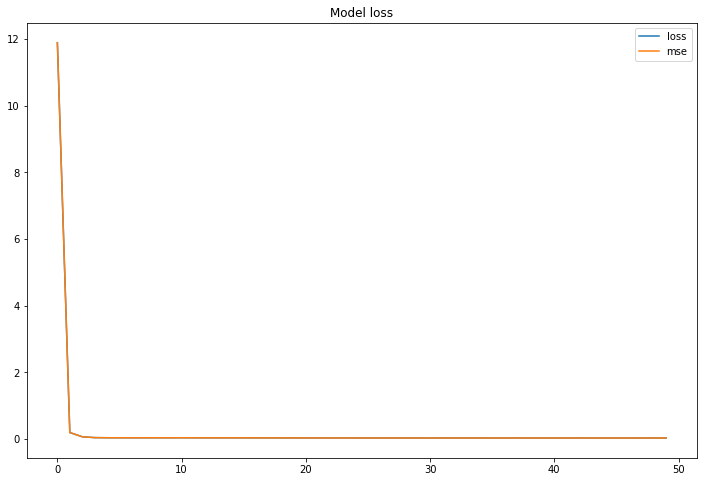

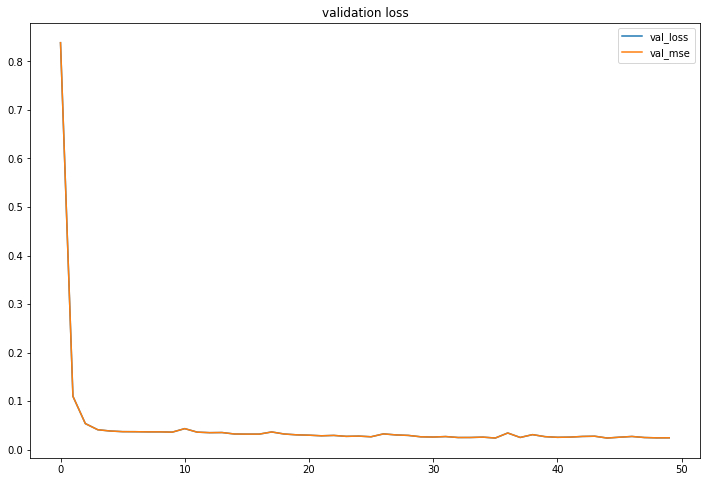

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)

df_loss= df_loss_acc[['loss','mse']]


df_acc= df_loss_acc[['val_loss','val_mse']]


df_loss.plot(title='Model loss',figsize=(12,8))
df_acc.plot(title='validation loss',figsize=(12,8))

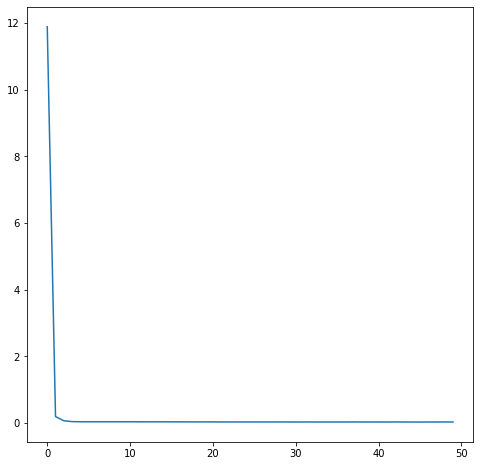

In [ ]:
# plot metrics  'mse'
from matplotlib import pyplot
import matplotlib
pyplot.plot(history.history['mse'])
pyplot.show()